In [1]:
from math import exp
from math import pow
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import copy

In [37]:
## using solve_ivp, you could choose the numeric method
dt = 0.1 # this is the step size we ask the computer to return a value

## parameters
gr=0.8
pv=210
pf=10**-5
pc=1.2
pb=0.52
ps=12
pl=4
dv=5
di=2
df=2
de=0.57
dp=0.5
ds=2
dl=0.015
B=5*10**-7
B2=3*10**-8
phi=0.33
rho=2.6
ks=0.8
kl=0.4
kn=2.5
ke=5*10**-5
Bcn=1
Bbn=0.03
hc=10**4
hb=10**4
tc=6
tb=4
indC = round (tc/dt+1)
indB = round (tb/dt+1)


time = np.arange(0,100,dt) ## this is how many "value of time point" you expect

## initial settings
## note: we create 11 numpy arrays and each time finishes estimataion, save the value into the representing array
V =np.zeros(len(time))
V[0]=1e+4; ## This is initial number of viral load
T = np.zeros(len(time))
T[0]=7e+7;  ## This is initial number of Target cell pool
T0=7e+7
I = np.zeros(len(time))
I[0]=0; ## This is initial number of infected cells, as 0
R=copy.copy(I) ; ## This is initial number of Resistent cells, as 0
F=copy.copy(I); ## This is initial number of IFN, as 0
Cn=100*np.ones(len(time));  ## This is initial number of T cells, as100
Bn=100*np.ones(len(time));  ## This is initial number of proliferation B cells, as100
E=np.zeros(indC+len(time)); ## This is initial number of Effect T cells, as 0
P=copy.copy(I); ## This is initial number of plasma cells B cells, as 0
AS=np.zeros(indB+len(time)); ## This is initial number of short-time antibody, as 0
AL=AS; ## This is initial number of long-time antibody, as 0


## pack the initial value into an array
init = np.array([V[0],T[0],I[0],R[0],F[0],Cn[0],E[0],Bn[0],P[0],AS[0],AL[0]])

def f(t,y,Ecur,AScur,ALcur,gr,pv,pf,pc,pb,ps,pl,dv,di,df,de,dp,ds,dl,B,B2,phi,rho,ks,kl,kn,ke,Bcn,Bbn,hc,hb,tc,tb):
    
    z=np.zeros(np.size(y))

    z[0]=pv*y[2]-dv*y[0]-ks*y[0]*AScur-kl*y[0]*ALcur-B*y[0]*y[1]
    
    z[1]=gr*(y[1]+y[4])*(1-(y[1]+y[4]+y[2])/T0)-B2*y[0]*y[1]+rho*y[4]-phi*y[3]*y[1]
    z[2]=B2*y[0]*y[1]-di*y[2]-kn*y[2]*y[3]-ke*y[2]*Ecur
    z[3]=pf*y[2]-df*y[3]
    z[4]=phi*y[3]*y[1]-rho*y[4]
    
    z[5]=-Bcn*(y[0]/((y[0])+hc))*y[5]
    z[6]=Bcn*(y[0]/((y[0])+hc))*y[5]*exp(pc*tc)-de*y[6]
    z[7]=-Bbn*(y[0]/((y[0])+hb))*y[7]
    z[8]=Bbn*(y[0]/((y[0])+hb))*y[7]*exp(pb*tb)-dp*y[8]
    z[9]=ps*y[8]-ds*y[9]
    z[10]=pl*y[8]-dl*y[10]
    return z



Ecur = 0
AScur = 0
ALcur = 0

t_s = [0,dt] ## this is the tspan that solve_ivp needs. We call this function iteratively. each end is a move of time.

##here we ask the value from "dt"(0.1) toward 0.2 and 0.2 toward 0.3, till the end of time(100)
for i in range(1,len(time)):
        Ecur = E[i] ## ask the effect t cells in this point, before indC(delay)/dt, would be all 0
        AScur = AS[i] ## ask the short-time antibody in this point, before indB(delay)/dt,would be all 0
        ALcur = AL[i] ## ask the long-time antibody in this point, before indB(delay)/dt,would be all 0
        yap=spi.solve_ivp(f,t_s,init,t_eval = None,method='Radau',rtol=1e-8,args=(Ecur,AScur,ALcur,gr,pv,pf,pc,pb,ps,pl,dv,di,df,de,dp,ds,dl,B,B2,phi,rho,ks,kl,kn,ke,Bcn,Bbn,hc,hb,tc,tb))
        V[i] = yap.y[0,-1]
        T[i] = yap.y[1,-1]
        I[i] = yap.y[2,-1]
        R[i] = yap.y[3,-1]
        F[i] = yap.y[4,-1]
        Cn[i] = yap.y[5,-1]
        E[indC+i] =yap.y[6,-1] ## we save this effect t cell into a "future time point"
        Bn[i]=yap.y[7,-1]
        P[i] =yap.y[8,-1]
        AS[indB+i] =yap.y[9,-1] ## we save the short-time antibody into a "future time point"
        AL[indB+i] =yap.y[10,-1] ## we save the long-time antibody into a "future time point"
        time[i] = i*dt ## record the "true time"
        init = yap.y[:,-1] ## renew the initial value for next iteration(next time period)
     


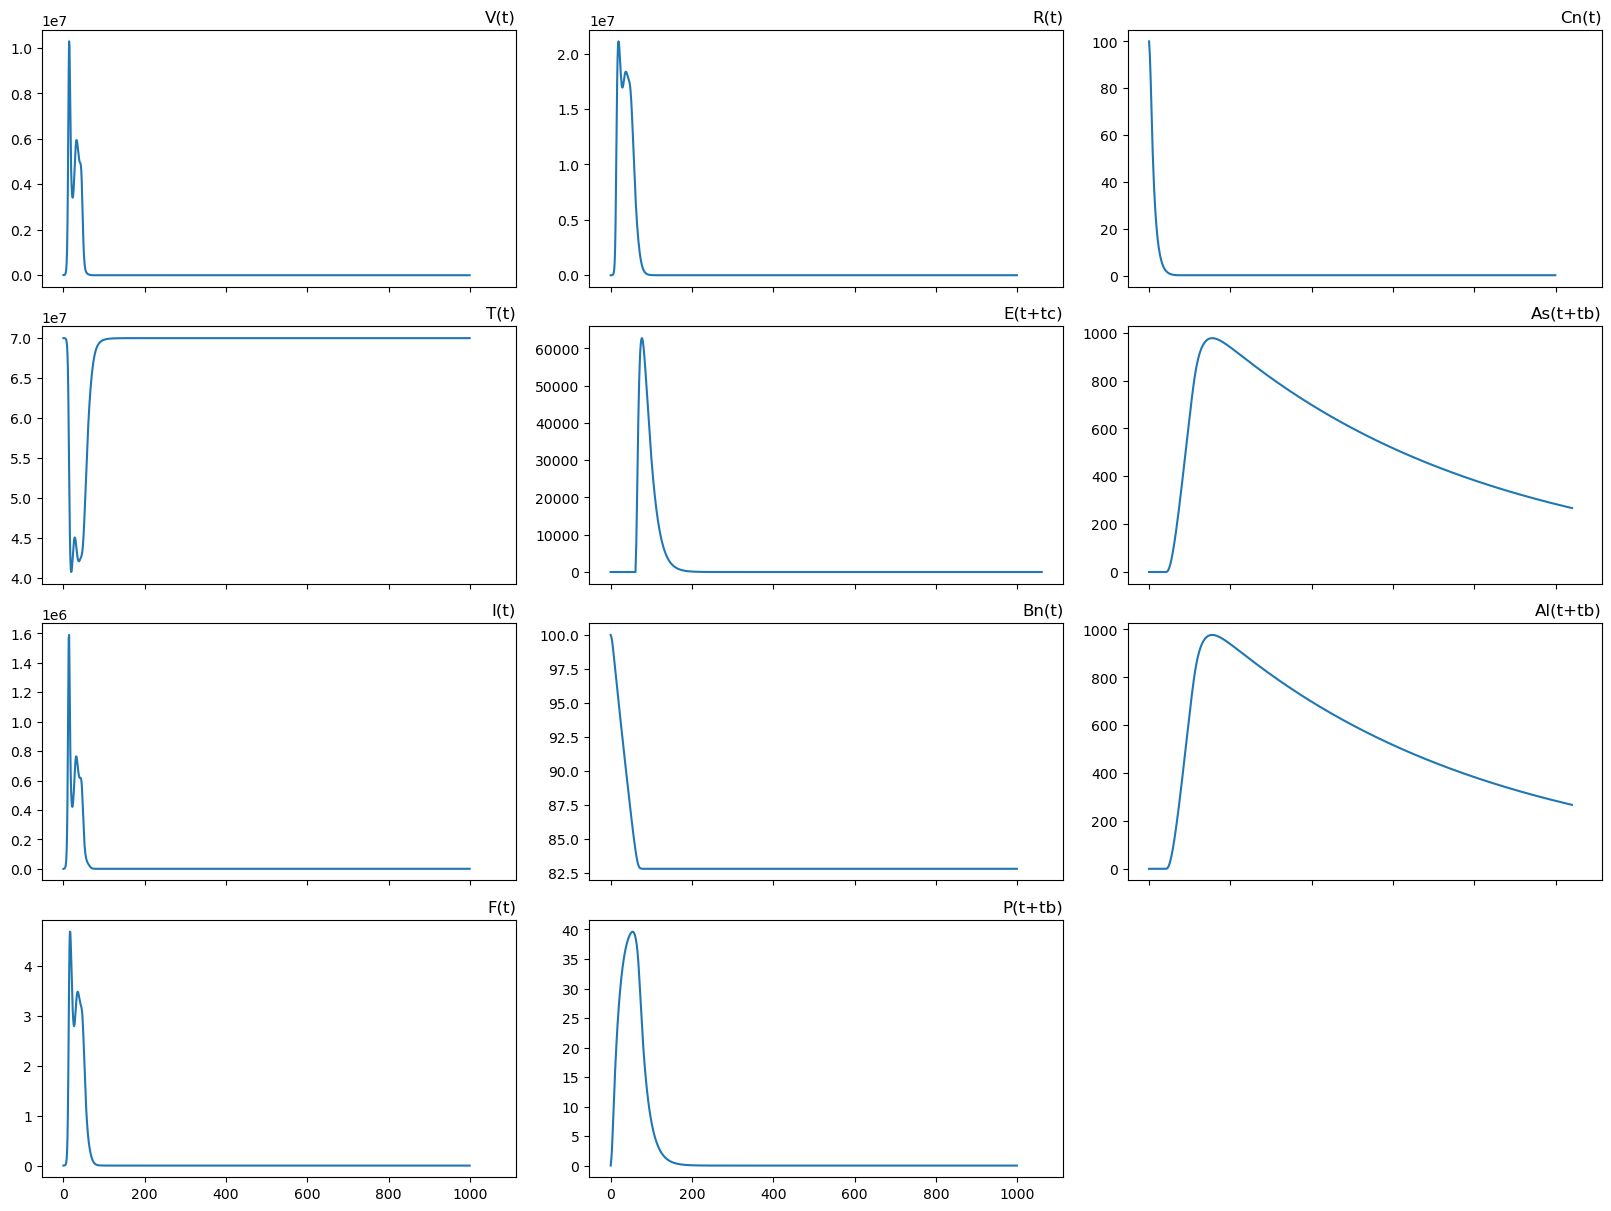

In [38]:
# draw the plot
fig, axs = plt.subplots(4, 3,sharex=True,constrained_layout=True)
plt.rcParams['figure.figsize'] = (16.0,12.0)
axs[0, 0].plot(V )
axs[0, 0].set_title('V(t)',loc='right')
axs[1, 0].plot(T )
axs[1, 0].set_title('T(t)',loc='right')
axs[2, 0].plot(I )
axs[2, 0].set_title('I(t)',loc='right')
axs[3, 0].plot(R )
axs[3, 0].set_title('F(t)',loc='right')
axs[0, 1].plot(F )
axs[0, 1].set_title('R(t)',loc='right')
axs[0, 2].plot(Cn )
axs[0, 2].set_title('Cn(t)',loc='right')
axs[1, 1].plot(E )
axs[1, 1].set_title('E(t+tc)',loc='right')
axs[2, 1].plot(Bn)
axs[2, 1].set_title('Bn(t)',loc='right')
axs[3, 1].plot(P )
axs[3, 1].set_title('P(t+tb)',loc='right')
axs[1, 2].plot(AS)
axs[1, 2].set_title('As(t+tb)',loc='right')
axs[2, 2].plot(AL)
axs[2, 2].set_title('Al(t+tb)',loc='right')
fig.delaxes(axs[3,2])


plt.show()

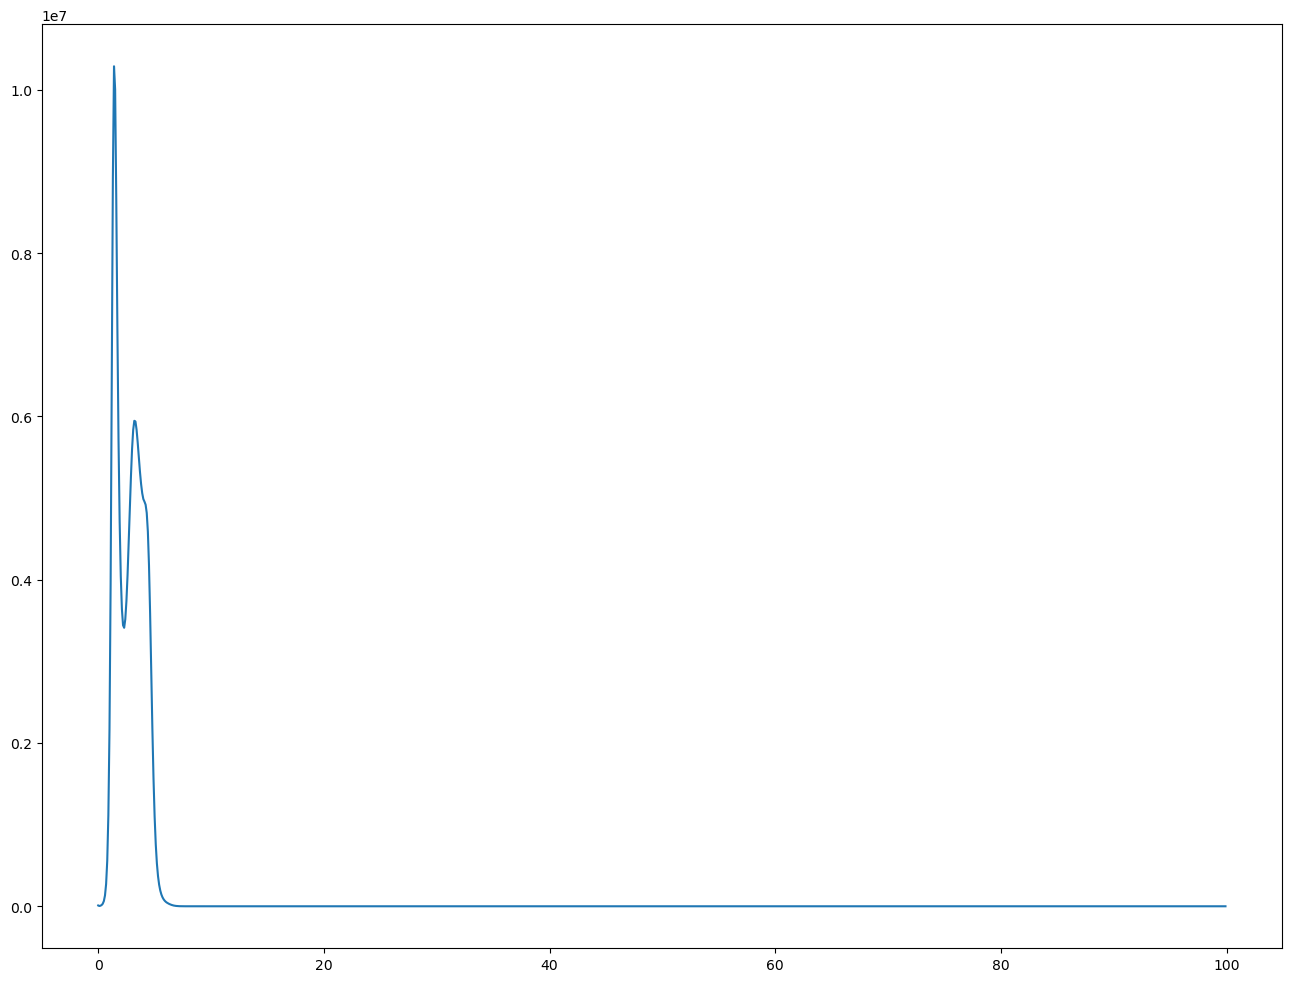

In [36]:
plt.plot(time,V)
plt.show()

In [21]:
## clear up the variables
for key in list(globals().keys()):
     if (not key.startswith("__")) and (key != "key"):
         globals().pop(key) 
         print(key)

del key


_i
_ii
_iii
_i12
_i13
dt
T0
gr
pv
pf
pc
pb
ps
pl
dv
di
df
de
dp
ds
dl
B
B2
phi
rho
ks
kl
kn
ke
Bcn
Bbn
hc
hb
tc
tb
indC
indB
_i14
exp
pow
np
spi
plt
copy
_i15
time
V
T
I
R
F
Cn
Bn
E
P
AS
AL
init
f
tps
Ecur
AScur
ALcur
i
yap
_i16
fig
axs
_i17
_i18
_i19
_i20
_i21


In [22]:
## reload the libraries
from math import exp
from math import pow
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import copy

In [23]:
## using  odeint, unable to choose numeric method

dt = 0.1 ## still, this is the step you ask the solver to return value


T0=7*10**7 ## This is target cell pool
gr=0.8
pv=210
pf=10**-5
pc=1.2
pb=0.52
ps=12
pl=4
dv=5
di=2
df=2
de=0.57
dp=0.5
ds=2
dl=0.015
B=5*10**-7
B2=3*10**-8
phi=0.33
rho=2.6
ks=0.8
kl=0.4
kn=2.5
ke=5*10**-5
Bcn=1
Bbn=0.03
hc=10**4
hb=10**4
tc=6
tb=4
indC = round (tc/dt+1)
indB = round (tb/dt+1)


time = np.arange(0,100,dt)

## initial settings
## note: we create 11 numpy arrays and each time finishes estimataion, save the value into the representing array
V =np.zeros(len(time))
V[0]=1e+4; ## This is initial number of viral load
T = np.zeros(len(time))
T[0]=7e+7;  ## This is initial number of Target cell pool
T0=7e+7
I = np.zeros(len(time))
I[0]=0; ## This is initial number of infected cells, as 0
R=copy.copy(I) ; ## This is initial number of Resistent cells, as 0
F=copy.copy(I); ## This is initial number of IFN, as 0
Cn=100*np.ones(len(time));  ## This is initial number of T cells, as100
Bn=100*np.ones(len(time));  ## This is initial number of proliferation B cells, as100
E=np.zeros(indC+len(time)); ## This is initial number of Effect T cells, as 0
P=copy.copy(I); ## This is initial number of plasma cells B cells, as 0
AS=np.zeros(indB+len(time)); ## This is initial number of short-time antibody, as 0
AL=AS; ## This is initial number of long-time antibody, as 0


## pack the initial value into an array
init = np.array([V[0],T[0],I[0],R[0],F[0],Cn[0],E[0],Bn[0],P[0],AS[0],AL[0]])

def f(y,t,Ecur,AScur,ALcur,gr,pv,pf,pc,pb,ps,pl,dv,di,df,de,dp,ds,dl,B,B2,phi,rho,ks,kl,kn,ke,Bcn,Bbn,hc,hb,tc,tb):
    
    z=np.zeros(np.size(y))

    z[0]=pv*y[2]-dv*y[0]-ks*y[0]*AScur-kl*y[0]*ALcur-B*y[0]*y[1]
    
    z[1]=gr*(y[1]+y[4])*(1-(y[1]+y[4]+y[2])/T0)-B2*y[0]*y[1]+rho*y[4]-phi*y[3]*y[1]
    z[2]=B2*y[0]*y[1]-di*y[2]-kn*y[2]*y[3]-ke*y[2]*Ecur
    z[3]=pf*y[2]-df*y[3]
    z[4]=phi*y[3]*y[1]-rho*y[4]
    
    z[5]=-Bcn*(y[0]/((y[0])+hc))*y[5]
    z[6]=Bcn*(y[0]/((y[0])+hc))*y[5]*exp(pc*tc)-de*y[6]
    z[7]=-Bbn*(y[0]/((y[0])+hb))*y[7]
    z[8]=Bbn*(y[0]/((y[0])+hb))*y[7]*exp(pb*tb)-dp*y[8]
    z[9]=ps*y[8]-ds*y[9]
    z[10]=pl*y[8]-dl*y[10]
    return z






tps=[0,dt]

Ecur = 0
AScur = 0
ALcur = 0


for i in range(1,len(time)):
        Ecur = E[i] ## ask the effect t cells in this point, before indC(delay)/dt, would be all 0
        AScur = AS[i] ## ask the short-time antibody in this point, before indB(delay)/dt,would be all 0
        ALcur = AL[i] ## ask the long-time antibody in this point, before indB(delay)/dt,would be all 0

        yap=spi.odeint(f,init,tps,args=(Ecur,AScur,ALcur,gr,pv,pf,pc,pb,ps,pl,dv,di,df,de,dp,ds,dl,B,B2,phi,rho,ks,kl,kn,ke,Bcn,Bbn,hc,hb,tc,tb))
        V[i] = yap[-1,0]
        T[i] = yap[-1,1]
        I[i] = yap[-1,2]
        R[i] = yap[-1,3]
        F[i] = yap[-1,4]
        Cn[i] = yap[-1,5]
        E[indC+i] =yap[-1,6] ## we save this effect t cell into a "future time point"
        Bn[i]=yap[-1,7]
        P[i] =yap[-1,8]
        AS[indB+i] =yap[-1,9] ## we save the short-time antibody into a "future time point"
        AL[indB+i] =yap[-1,10] ## we save the long-time antibody into a "future time point"
        time[i] = i*dt ## record the "true time"
        init = yap[-1,:] ## renew the initial value for next iteration(next time period)
    

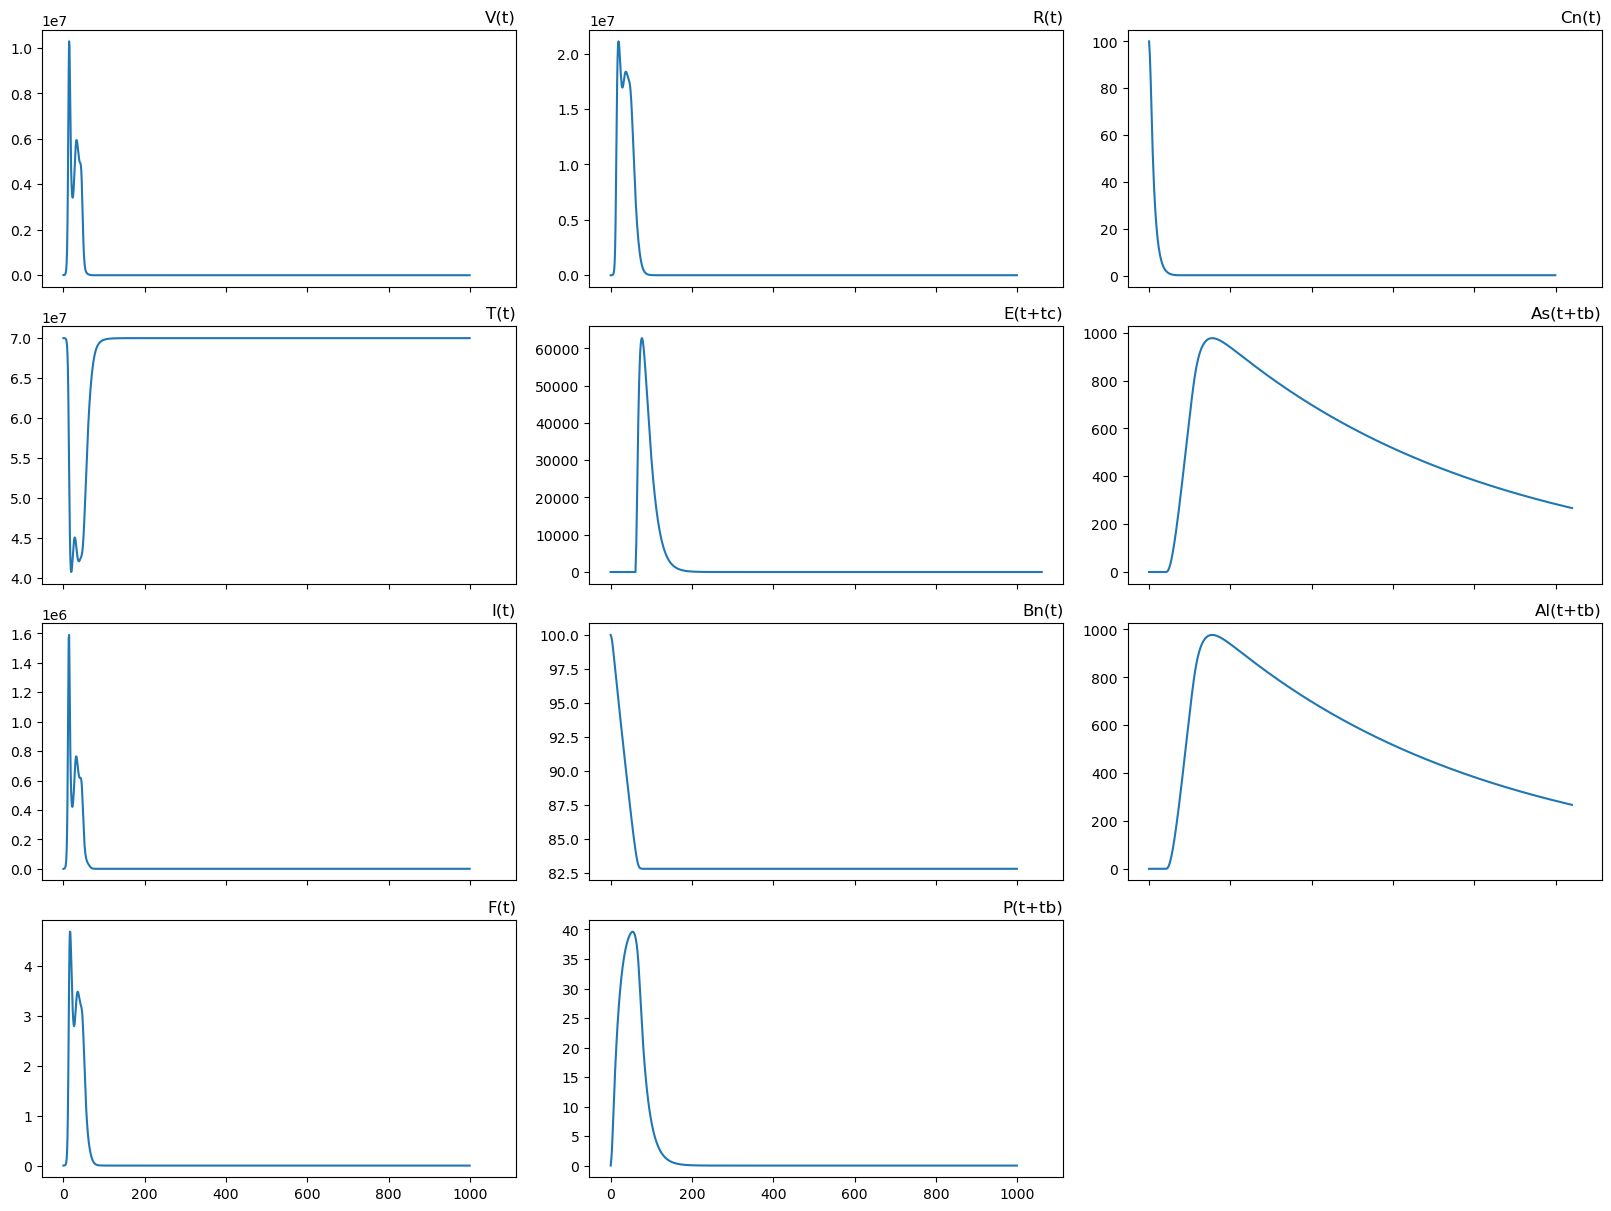

In [16]:
fig, axs = plt.subplots(4, 3,sharex=True,constrained_layout=True)
plt.rcParams['figure.figsize'] = (16.0,12.0)
axs[0, 0].plot(V )
axs[0, 0].set_title('V(t)',loc='right')
axs[1, 0].plot(T )
axs[1, 0].set_title('T(t)',loc='right')
axs[2, 0].plot(I )
axs[2, 0].set_title('I(t)',loc='right')
axs[3, 0].plot(R )
axs[3, 0].set_title('F(t)',loc='right')
axs[0, 1].plot(F )
axs[0, 1].set_title('R(t)',loc='right')
axs[0, 2].plot(Cn )
axs[0, 2].set_title('Cn(t)',loc='right')
axs[1, 1].plot(E )
axs[1, 1].set_title('E(t+tc)',loc='right')
axs[2, 1].plot(Bn)
axs[2, 1].set_title('Bn(t)',loc='right')
axs[3, 1].plot(P )
axs[3, 1].set_title('P(t+tb)',loc='right')
axs[1, 2].plot(AS)
axs[1, 2].set_title('As(t+tb)',loc='right')
axs[2, 2].plot(AL)
axs[2, 2].set_title('Al(t+tb)',loc='right')
fig.delaxes(axs[3,2])


plt.show()




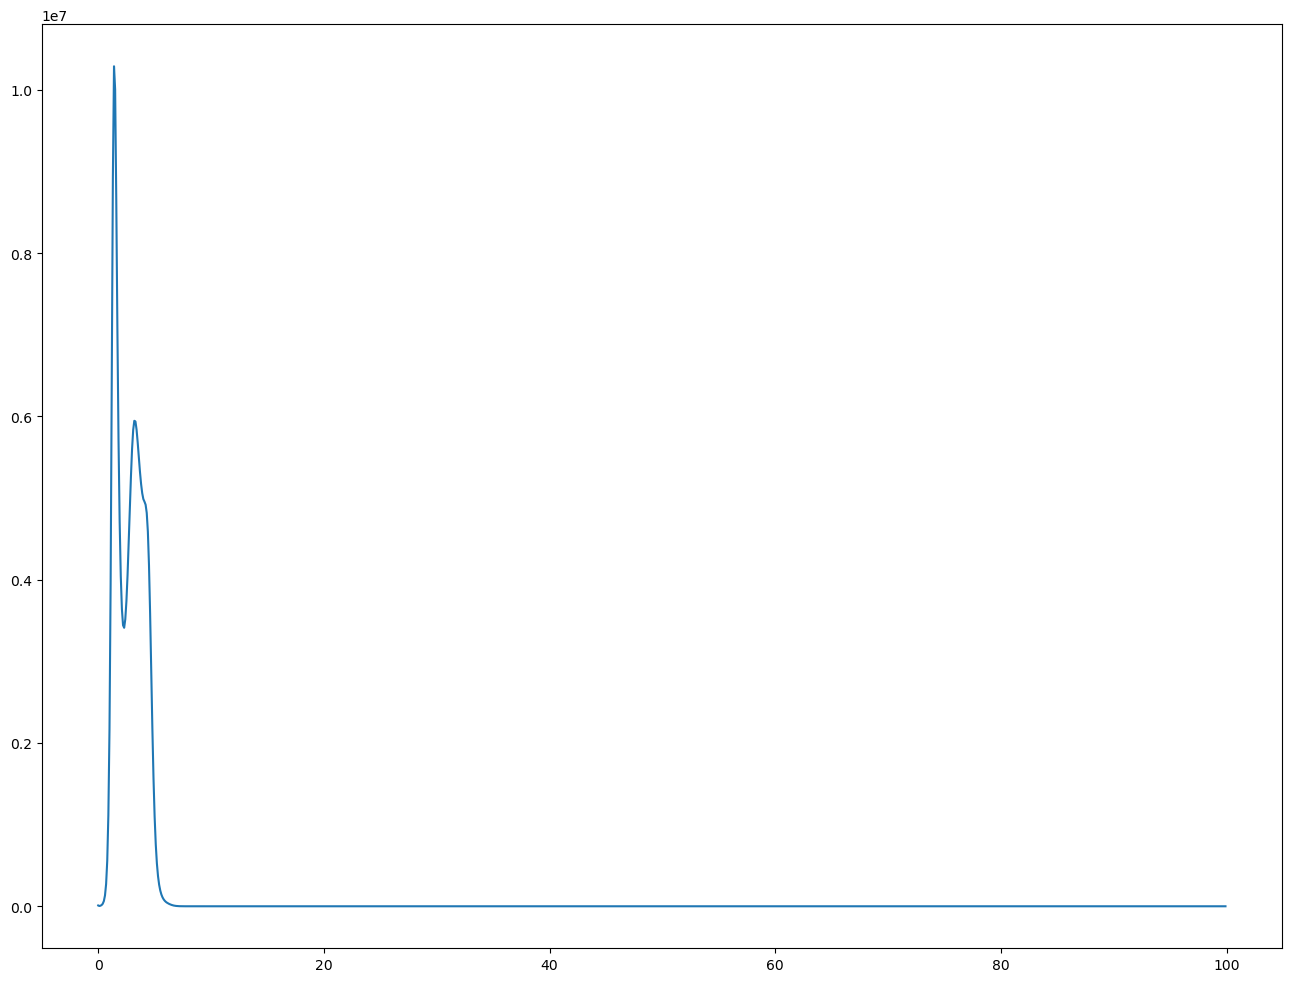

In [25]:
plt.plot(time,V)
plt.show()

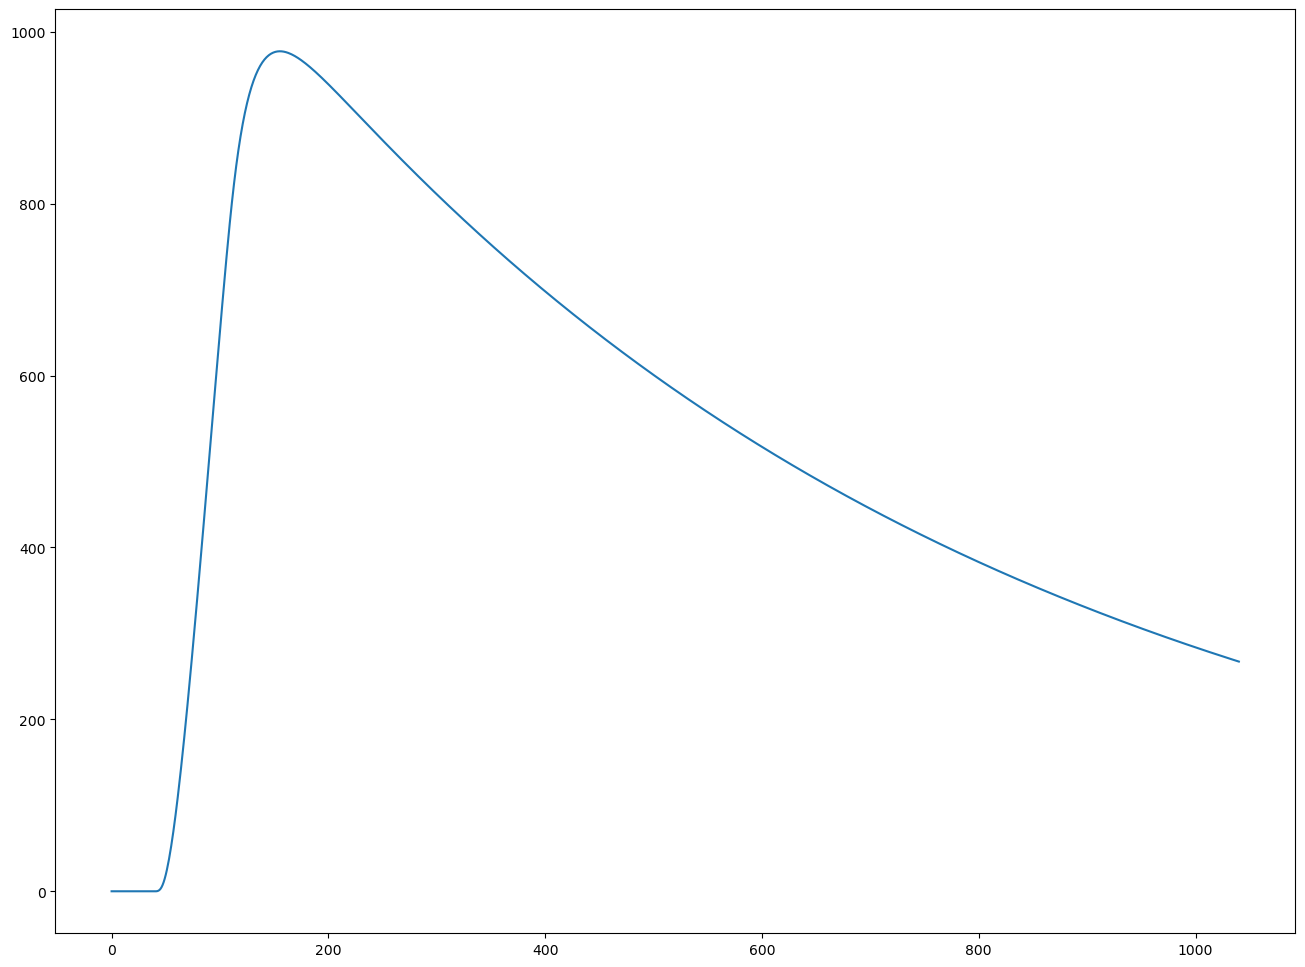

In [26]:
plt.plot(AS)
plt.show()

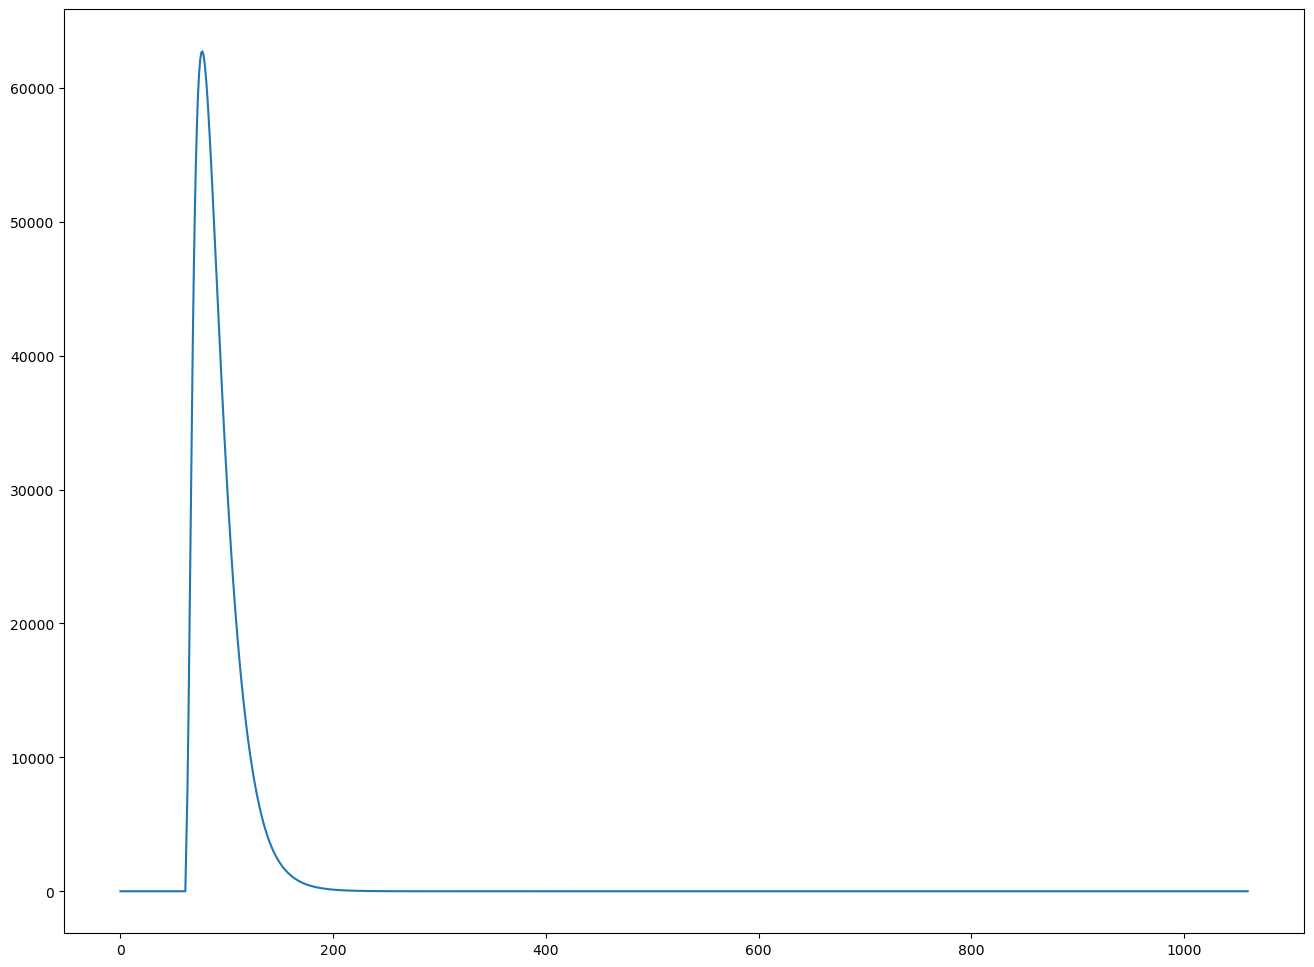

In [27]:
plt.plot(E)
plt.show()